In [18]:
!pip install python-bcb
!pip install matplotlib
!pip install seaborn
!pip install pandas
!pip install numpy
!pip install statsmodels
!pip install linearmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.2 MB/s eta 0:00:00


In [25]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
import bcb as bcb
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
from bcb import sgs
import linearmodels as lm

In [66]:
confianca_consumidor=sgs.get({'indice_confianca_consumidor':4393})
confianca_empresario_industrial=sgs.get({'indice_confianca_empresario':7341})
confianca_servicos=sgs.get({'indice_confianca_servicos':17660})

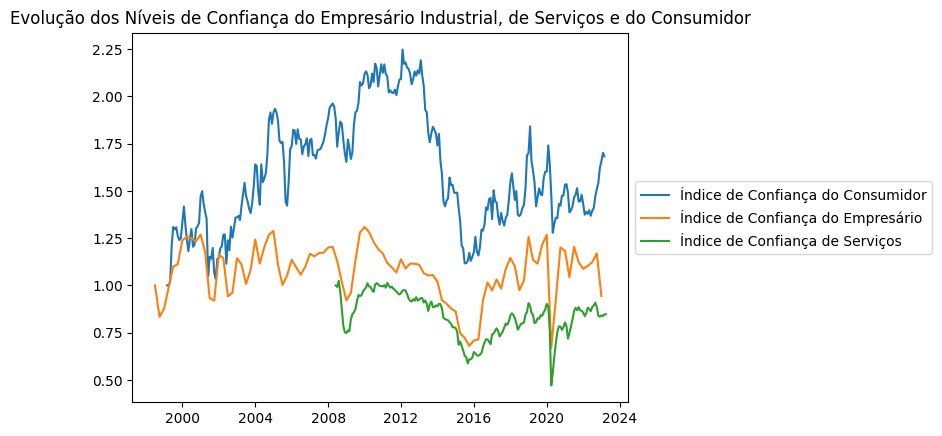

In [68]:
confianca_consumidor_indice = confianca_consumidor['indice_confianca_consumidor'] / confianca_consumidor['indice_confianca_consumidor'][0]
confianca_empresario_industrial_indice = confianca_empresario_industrial['indice_confianca_empresario'] / confianca_empresario_industrial['indice_confianca_empresario'][0]
confianca_servicos_indice = confianca_servicos['indice_confianca_servicos'] / confianca_servicos['indice_confianca_servicos'][0]

plt.plot(confianca_consumidor_indice, label = 'Índice de Confiança do Consumidor')
plt.plot(confianca_empresario_industrial_indice, label = 'Índice de Confiança do Empresário')
plt.plot(confianca_servicos_indice, label = 'Índice de Confiança de Serviços')
plt.title('Evolução dos Níveis de Confiança do Empresário Industrial, de Serviços e do Consumidor')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

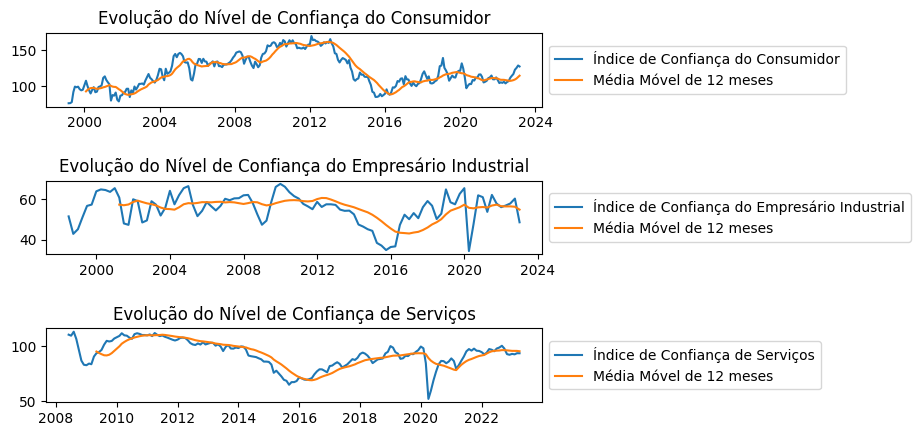

In [69]:
confianca_consumidor['confianca_consumidor_mm12'] = confianca_consumidor['indice_confianca_consumidor'].rolling(window=12).mean()
confianca_empresario_industrial['confianca_empresario_mm12'] = confianca_empresario_industrial['indice_confianca_empresario'].rolling(window=12).mean()
confianca_servicos['confianca_servicos_mm12'] = confianca_servicos['indice_confianca_servicos'].rolling(window=12).mean()
plt.subplots_adjust(hspace=1.0, wspace=0.2)
plt.subplot(311)
plt.plot(confianca_consumidor['indice_confianca_consumidor'], label='Índice de Confiança do Consumidor')
plt.plot(confianca_consumidor['confianca_consumidor_mm12'], label='Média Móvel de 12 meses')
plt.title('Evolução do Nível de Confiança do Consumidor')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplot(312)
plt.plot(confianca_empresario_industrial['indice_confianca_empresario'], label='Índice de Confiança do Empresário Industrial')
plt.plot(confianca_empresario_industrial['confianca_empresario_mm12'], label='Média Móvel de 12 meses')
plt.title('Evolução do Nível de Confiança do Empresário Industrial')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplot(313)
plt.plot(confianca_servicos['indice_confianca_servicos'], label='Índice de Confiança de Serviços')
plt.plot(confianca_servicos['confianca_servicos_mm12'], label='Média Móvel de 12 meses')
plt.title('Evolução do Nível de Confiança de Serviços')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [70]:
confianca_consumidor.drop(columns={'confianca_consumidor_mm12'}, inplace=True)
confianca_empresario_industrial.drop(columns={'confianca_empresario_mm12'}, inplace=True)
confianca_servicos.drop(columns={'confianca_servicos_mm12'}, inplace=True)

confianca_consumidor['Data'] = confianca_consumidor.index
confianca_empresario_industrial['Data'] = confianca_empresario_industrial.index
confianca_servicos['Data'] = confianca_servicos.index

confianca_consumidor['Data'] = pd.to_datetime(confianca_consumidor['Data'])
confianca_empresario_industrial['Data'] = pd.to_datetime(confianca_empresario_industrial['Data'])
confianca_servicos['Data'] = pd.to_datetime(confianca_servicos['Data'])

dummies_confianca_consumidor = pd.get_dummies(confianca_consumidor['Data'].dt.month, prefix='Mes')
dummies_confianca_empresario_industrial = pd.get_dummies(confianca_empresario_industrial['Data'].dt.month, prefix='Mes')
dummies_confianca_servicos = pd.get_dummies(confianca_servicos['Data'].dt.month, prefix='Mes')

confianca_consumidor = confianca_consumidor.join(dummies_confianca_consumidor)
confianca_empresario_industrial = confianca_empresario_industrial.join(dummies_confianca_empresario_industrial)
confianca_servicos = confianca_servicos.join(dummies_confianca_servicos)

In [72]:
modelo_confianca_consumidor=smf.ols(formula='indice_confianca_consumidor ~ Mes_1 + Mes_2 + Mes_3 + Mes_4 + Mes_5 + Mes_6 + Mes_7 + Mes_8 + Mes_9 + Mes_10 + Mes_11 + Mes_12', data= confianca_consumidor)
modelo_confianca_empresario=smf.ols(formula='indice_confianca_empresario ~ Mes_1 + Mes_4 + Mes_7 + Mes_10', data= confianca_empresario_industrial)
modelo_confianca_servicos=smf.ols(formula='indice_confianca_servicos ~ Mes_1 + Mes_2 + Mes_3 + Mes_4 + Mes_5 + Mes_6 + Mes_7 + Mes_8 + Mes_9 + Mes_10 + Mes_11 + Mes_12', data= confianca_servicos)

resultado_confianca_consumidor=modelo_confianca_consumidor.fit()
resultado_confianca_empresario=modelo_confianca_empresario.fit()
resultado_confianca_servicos=modelo_confianca_servicos.fit()


In [ ]:
resultado_confianca_consumidor.summary()
resultado_confianca_empresario.summary()
resultado_confianca_servicos.summary()

In [73]:
def test_stationarity(timeseries):
    
    # Determinar as estatísticas móveis
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    # Criar a grade de subplots
    fig, axs = plt.subplots(2, 1, figsize=(10, 8))

    # Plotar os gráficos de orig, mean e std
    axs[0].plot(timeseries, color='blue', label='Original')
    axs[0].plot(rolmean, color='red', label='Rolling Mean')
    axs[0].plot(rolstd, color='black', label='Rolling Std')
    axs[0].legend(loc='best')
    axs[0].set_title('Teste de Estacionariedade')

    # Realizar o teste de Dickey-Fuller
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

    # Ajustar o espaçamento entre os subplots
    plt.tight_layout()

    # Exibir apenas a parte das estatísticas sem gráfico vazio
    axs[1].axis('off')
    axs[1].text(0, 0.5, dfoutput.to_string(), fontsize=10, verticalalignment='center')

    # Exibir o gráfico
    plt.show()

Results of Dickey-Fuller Test:
Test Statistic                  -2.501903
p-value                          0.115012
#Lags Used                       0.000000
Number of Observations Used    288.000000
Critical Value (1%)             -3.453262
Critical Value (5%)             -2.871628
Critical Value (10%)            -2.572146
dtype: float64


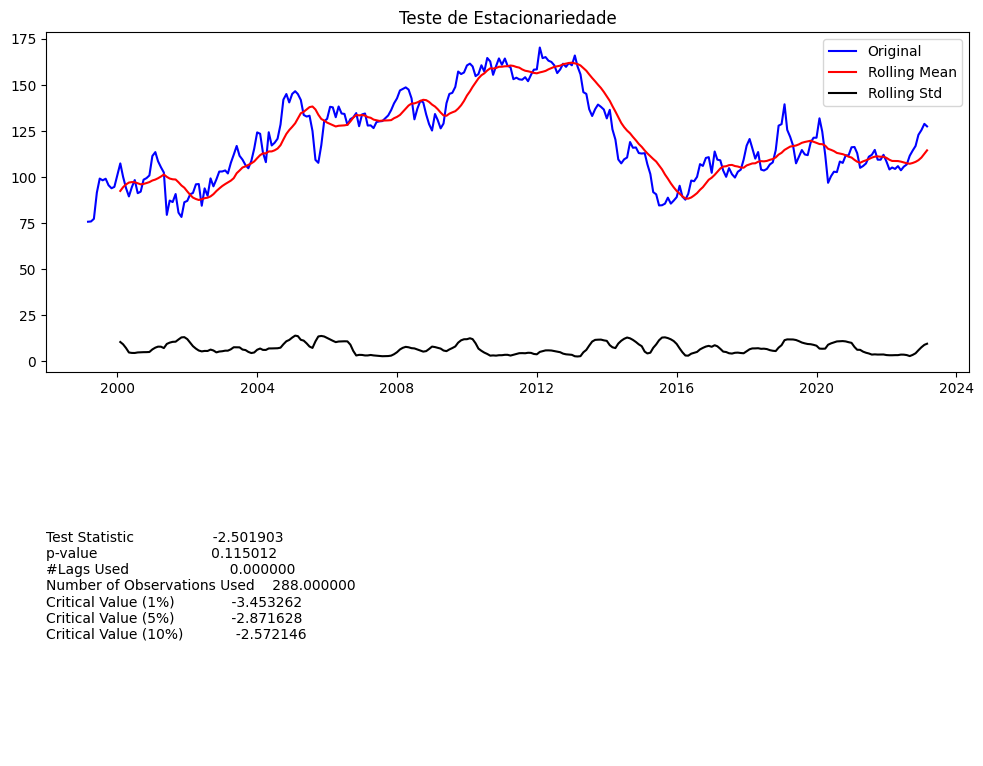

In [75]:
test_stationarity(confianca_consumidor['indice_confianca_consumidor'])

Results of Dickey-Fuller Test:
Test Statistic                 -2.662045
p-value                         0.080840
#Lags Used                      5.000000
Number of Observations Used    93.000000
Critical Value (1%)            -3.502705
Critical Value (5%)            -2.893158
Critical Value (10%)           -2.583637
dtype: float64


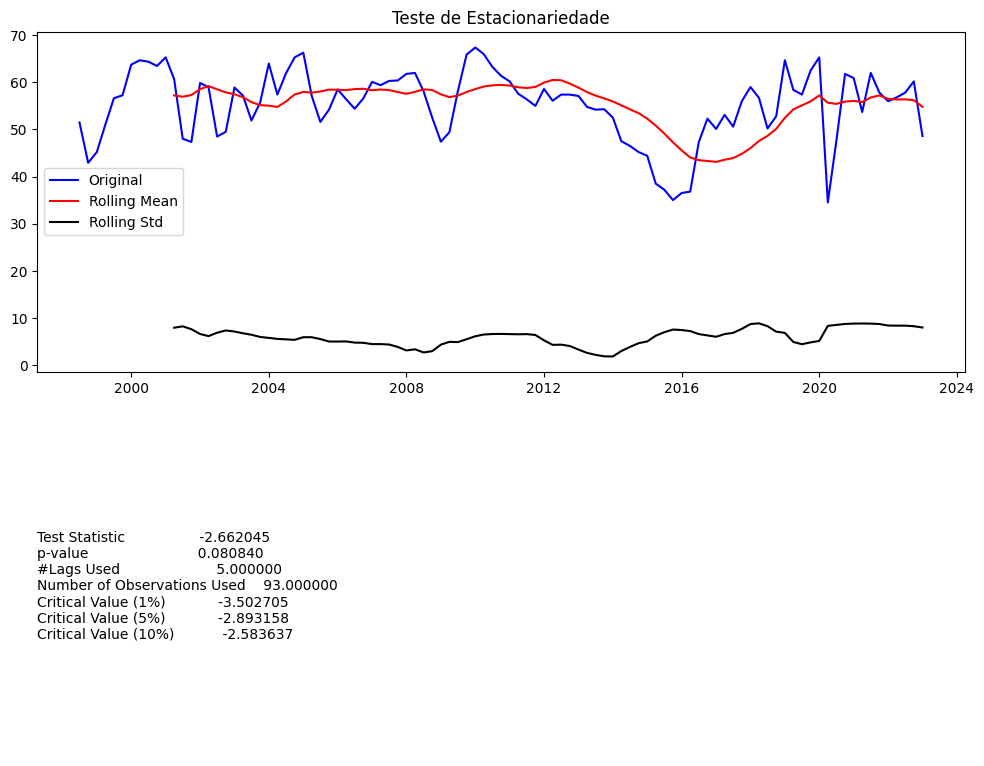

In [76]:
test_stationarity(confianca_empresario_industrial['indice_confianca_empresario'])

Results of Dickey-Fuller Test:
Test Statistic                  -1.940972
p-value                          0.313039
#Lags Used                      11.000000
Number of Observations Used    167.000000
Critical Value (1%)             -3.470126
Critical Value (5%)             -2.879008
Critical Value (10%)            -2.576083
dtype: float64


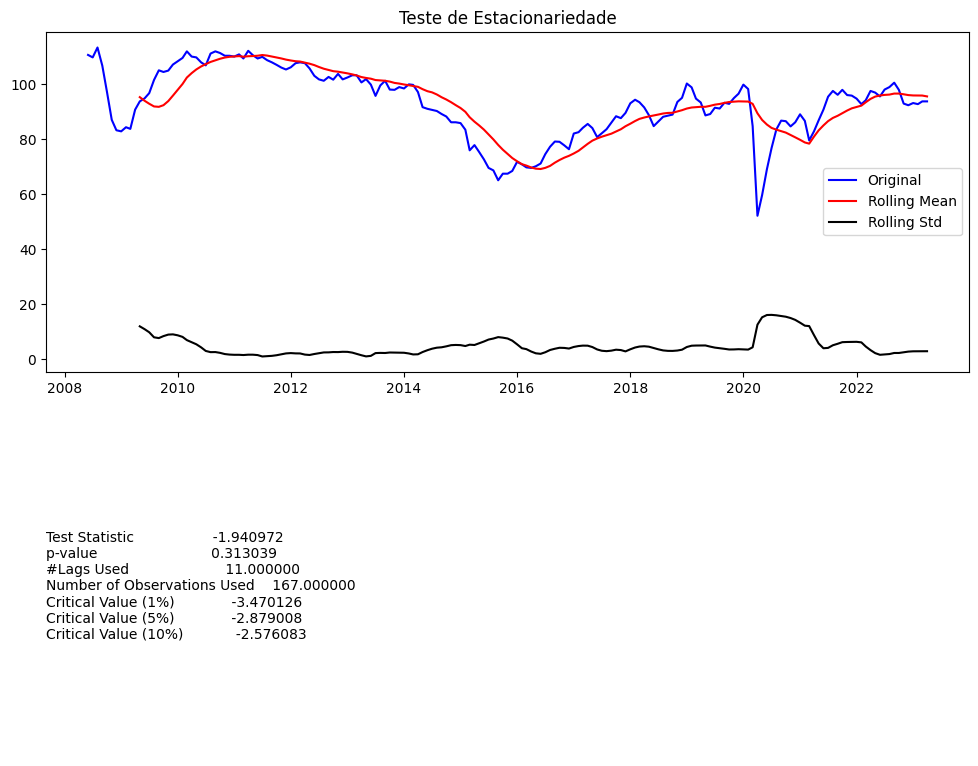

In [77]:
test_stationarity(confianca_servicos['indice_confianca_servicos'])

In [106]:
indice_confianca_consumidor=pd.DataFrame(confianca_consumidor['indice_confianca_consumidor'])
indice_confianca_empresario=pd.DataFrame(confianca_empresario_industrial['indice_confianca_empresario'])
indice_confianca_servicos=pd.DataFrame(confianca_servicos['indice_confianca_servicos'])

In [101]:
#indice_confianca_consumidor['Date']=indice_confianca_consumidor.index
#indice_confianca_empresario['Date']=indice_confianca_empresario.index
#indice_confianca_servicos['Date']=indice_confianca_servicos.index

In [109]:
dados=pd.merge(indice_confianca_consumidor,indice_confianca_empresario, on='Date', how='inner')
dados=pd.merge(dados,indice_confianca_servicos, on='Date', how='inner')
dados

,indice_confianca_consumidor,indice_confianca_empresario,indice_confianca_servicos
Date,,,
2008-07-01,131.23,58.1,109.7
2008-10-01,140.46,52.5,97.2
2009-01-01,125.16,47.4,82.8
2009-04-01,126.33,49.4,90.7
2009-07-01,145.01,58.2,96.7
2009-10-01,157.15,65.9,104.4
2010-01-01,160.47,67.4,108.3
2010-04-01,154.66,66.0,110.0
2010-07-01,157.16,63.3,106.8


In [110]:
modelo=smf.ols(formula='indice_confianca_consumidor ~ indice_confianca_empresario + indice_confianca_servicos', data=dados)
resultados=modelo.fit()
resultados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     indice_confianca_consumidor   R-squared:                       0.659
Model:                                     OLS   Adj. R-squared:                  0.647
Method:                          Least Squares   F-statistic:                     54.04
Date:                         Wed, 17 May 2023   Prob (F-statistic):           8.46e-14
Time:                                 02:55:26   Log-Likelihood:                -237.40
No. Observations:                           59   AIC:                             480.8
Df Residuals:                               56   BIC:                             487.0
Df Model:                                    2                                         
Covariance Type:                     nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -9.8139     13.769     -0.713      0.479     -37.397      17.769
indice_confianca_empresario    -0.5672      0.375     -1.511      0.136      -1.319       0.185
indice_confianca_servicos       1.7745      0.239      7.414      0.000       1.295       2.254
==============================================================================
Omnibus:                        9.469   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               10.036
Skew:                           0.707   Prob(JB):                      0.00662
Kurtosis:                       4.444   Cond. No.                         825.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
residuos=resultados.resid

Results of Dickey-Fuller Test:
Test Statistic                 -4.012253
p-value                         0.001348
#Lags Used                      0.000000
Number of Observations Used    58.000000
Critical Value (1%)            -3.548494
Critical Value (5%)            -2.912837
Critical Value (10%)           -2.594129
dtype: float64


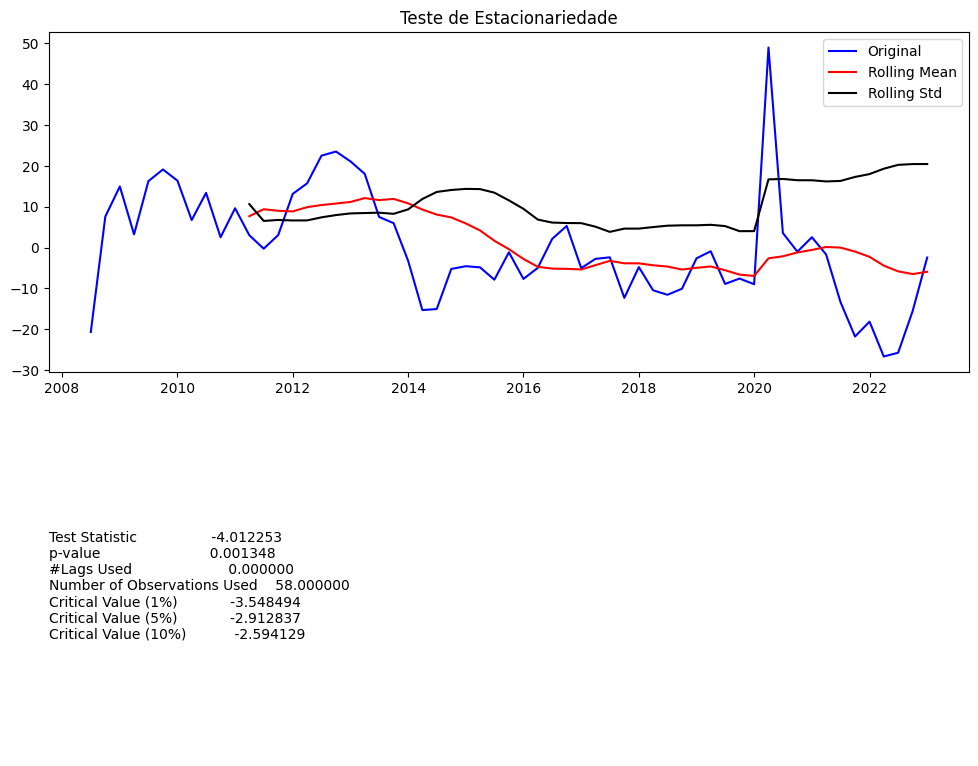

In [113]:
test_stationarity(residuos)